# Taking multiple .csv files concatinating them and analyzing them

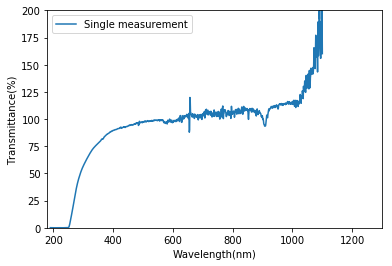

,Transmittance,Std.Dev.
0,0.100011,0.016147
1,0.060121,0.008177
2,0.090859,0.017454
3,0.075132,0.009659
4,0.100395,0.012889


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("./Data/example1.CSV")
files=[file for file in os.listdir("Data")]
all_data=pd.DataFrame()
for file in files:
    df2=pd.read_csv("./Data/"+file, index_col = 0)
    all_data=pd.concat([all_data,df2])
    all_data.to_csv("all_data.csv", index=False)
plt.plot(df1.Wave,df1.Transmittance)
plt.xlabel('Wavelength(nm)')
plt.ylabel('Transmittance(%)')
plt.ylim(0,200)
plt.xlim(180,1300)
plt.legend(['Single measurement'])
plt.show()
all_data=pd.read_csv("all_data.csv")
all_data.head() 




# Ploting different data in one graph 

.


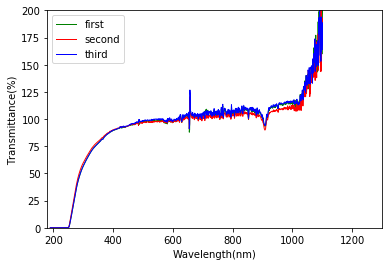

In [6]:
from pathlib import Path
path = Path("./Data")
print(path.parent)
DF1 = pd.read_csv("./Data/example1.CSV")
DF2=pd.read_csv("./Data/example2.CSV")
DF3=pd.read_csv("./Data/example3.CSV")
DF3.head()
plt.plot(DF1.Wave,DF1.Transmittance, color='g', linewidth=1)
plt.plot(DF2.Wave,DF2.Transmittance, color='r', linewidth=1)
plt.plot(DF3.Wave,DF3.Transmittance, color='b', linewidth=1)
plt.xlabel('Wavelength(nm)')
plt.ylabel('Transmittance(%)')
plt.legend(['first','second','third'])
plt.ylim(0,200)
plt.xlim(180,1300)
plt.show()

# Taking average over data and putting error bars on that

1.146486944378844
0.037984807085185056


Text(24.0, 0.5, 'Transmittance(%)')

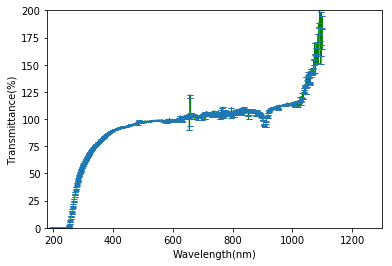

In [7]:
import math
Average_arr=[]
Average=(DF1.Transmittance+DF2.Transmittance+DF3.Transmittance)/3
for number in Average:
    Average_arr.append(number)
average=0
for number in Average_arr:
    average+=number/len(Average)
Sigma=0
for number in Average_arr:
    Sigma+=(number-average)*(number-average)
Sigma=math.sqrt(Sigma)/len(Average)
print(Sigma)
error=Sigma/math.sqrt(len(Average))
print(error)
plt.plot(DF1.Wave,Average,color='g', linewidth=1)
plt.errorbar(DF1.Wave, Average, yerr=error, capsize=3,ls='none')
plt.savefig("plot.pdf", bbox_inches='tight')
plt.ylim(0,200)
plt.xlim(180,1300)
plt.xlabel("Wavelength(nm)")
plt.ylabel("Transmittance(%)")

